# Module - 3 

# Logistic Regression

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('Coviddata.csv')

In [4]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12-11-2020,0,1,0,0,0,negative,No,male,Other
1,12-11-2020,1,0,0,0,0,negative,No,female,Other
2,12-11-2020,0,1,0,0,0,negative,No,female,Other
3,12-11-2020,0,0,0,0,0,negative,No,female,Other
4,12-11-2020,0,0,0,0,0,negative,No,male,Other


In [5]:
data.shape

(11864, 10)

In [5]:
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [6]:
df = data

In [7]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['corona_result', 'age_60_and_above', 'gender', 'test_indication']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.age_60_and_above.unique()

array([0, 1, 2])

In [10]:
df.gender.unique()

array([1, 0, 2])

In [11]:
df.test_indication.unique()

array([2, 0, 1])

In [12]:
df.corona_result.unique()

array([0, 2, 1])

In [13]:
p.Categorical(df.corona_result).describe()

,counts,freqs
categories,,
0,9994,0.842380
1,448,0.037761
2,1422,0.119858


In [14]:
df['result'] = df.corona_result.map({0:0,1:1,2:1})

In [15]:
df.result.unique()

array([0, 1], dtype=int64)

In [16]:
p.Categorical(df['result']).describe()

,counts,freqs
categories,,
0,9994,0.84238
1,1870,0.15762


In [17]:
del df['corona_result']
del df["test_date"]

In [18]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication', 'result'],
      dtype='object')

In [19]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='result', axis=1)
#Response variable
y = df.loc[:,'result'] 

In [21]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print("o d s: ",Counter(y))
print("r d s: ",Counter(y_ros))






o d s:  Counter({0: 9994, 1: 1870})
r d s:  Counter({0: 9994, 1: 9994})


In [42]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  8304
Number of test dataset:  3560
Total number of dataset:  11864


In [43]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictLR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))

print("")
cm1=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2999
           1       0.83      0.51      0.63       561

    accuracy                           0.91      3560
   macro avg       0.87      0.75      0.79      3560
weighted avg       0.90      0.91      0.90      3560


Confusion Matrix result of Logistic Regression is:
 [[2940   59]
 [ 274  287]]

Sensitivity :  0.980326775591864

Specificity :  0.5115864527629234

Cross validation test results of accuracy:
[0.90307627 0.89169827 0.91824694 0.90181205 0.90177066]

Accuracy result of Logistic Regression is: 90.33208403419867


In [45]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("c"))
    plt.title("Accuracy comparison of Covid Result",fontsize=15)
    plt.legend(b,data,fontsize=9)

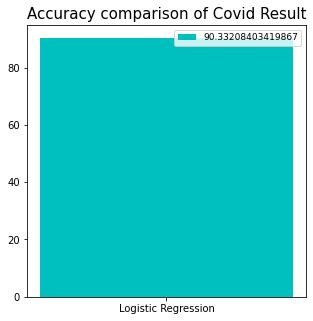

In [46]:
graph()

In [47]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 2940
True Negative : 59
False Positive : 274
False Negative : 287

True Positive Rate : 0.911062906724512
True Negative Rate : 0.17717717717717718
False Positive Rate : 0.8228228228228228
False Negative Rate : 0.08893709327548807

Positive Predictive Value : 0.9147479775980087
Negative predictive value : 0.17052023121387283


Confusion matrix-Logistic Regression:
[[2940   59]
 [ 274  287]]


<AxesSubplot:>

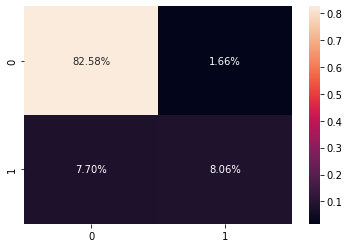

In [66]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Logistic Regression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictLR)
print('Confusion matrix-Logistic Regression:')
print(cm1)
s.heatmap(cm1/n.sum(cm1),annot =True, fmt='.2%')
#s.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
 #           fmt='.2%', cmap='Blues')